Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Simple Linear Regression

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importing the dataset

In [3]:
data = pd.read_csv(r'E:\Github\Datasets\Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Summary Statistics of Data

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Visualizing columns

<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

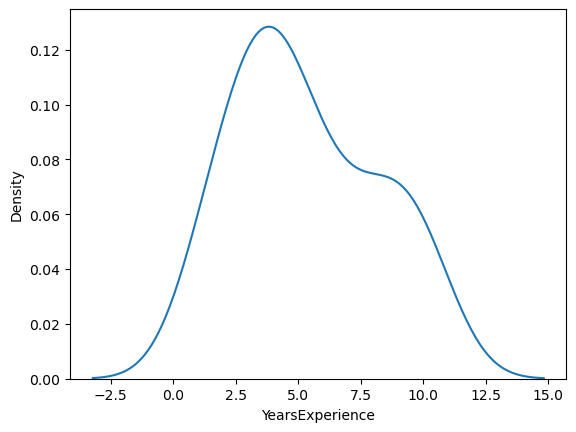

In [8]:
sns.kdeplot(x = 'YearsExperience', data = data )

<AxesSubplot: xlabel='YearsExperience', ylabel='Count'>

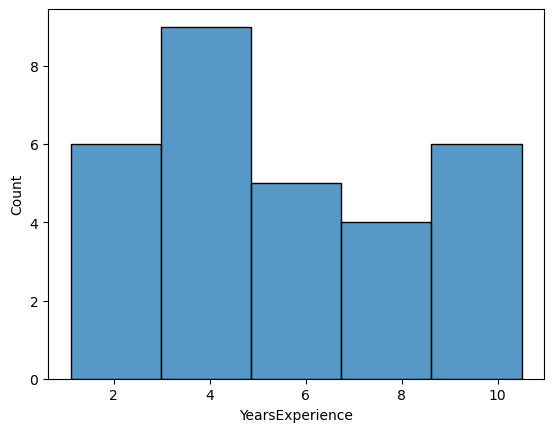

In [10]:
sns.histplot(x = 'YearsExperience', data = data, bins = 5)

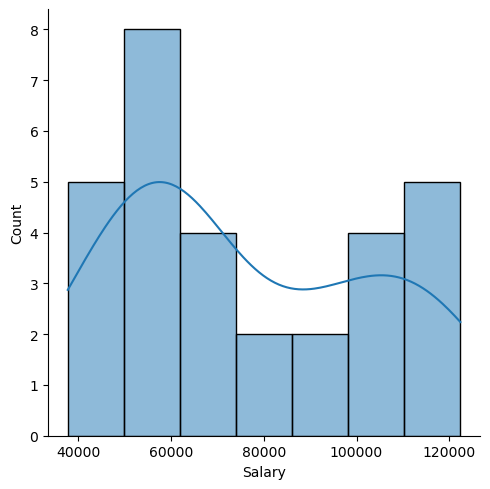

In [16]:
sns.displot(x = 'Salary', data = data, kde = True, bins = 7)

Splitting the dataset

In [17]:
X = data.drop('Salary', axis = 1).values
y = data['Salary'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train.shape, X_test.shape

((24, 1), (6, 1))

In [26]:
y_train.shape, y_test.shape

((24,), (6,))

Building the Simple Linear Regression Model and making predictions

In [23]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)

In [41]:
y_pred_train = regressor.predict(X_train)

In [30]:
type(y_test), type(y_pred)

(numpy.ndarray, numpy.ndarray)

In [39]:
actual_pred_df = pd.concat([pd.DataFrame(y_test, columns=['Actual']), pd.DataFrame(y_pred, columns=['Predicted'])], 
                           axis = 1)
actual_pred_df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


Model Evaluation

In [42]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r_squared_train = r2_score(y_train, y_pred_train)


mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test, y_pred)

In [43]:
print(f'Mean Absolute Error (Train): {mae_train}')
print(f'Mean Absolute Error (Test): {mae_test}\n')

print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'Root Mean Squared Error (Test): {rmse_test}\n')

print(f'R Squared (Train): {r_squared_train}')
print(f'R Squared (Test): {r_squared_test}')

Mean Absolute Error (Train): 5221.078554315732
Mean Absolute Error (Test): 2446.1723690465055

Root Mean Squared Error (Train): 6012.459573099956
Root Mean Squared Error (Test): 3580.979237321343

R Squared (Train): 0.9411949620562126
R Squared (Test): 0.988169515729126


Visualizing the results

In [64]:
X_train.ravel().shape

(24,)

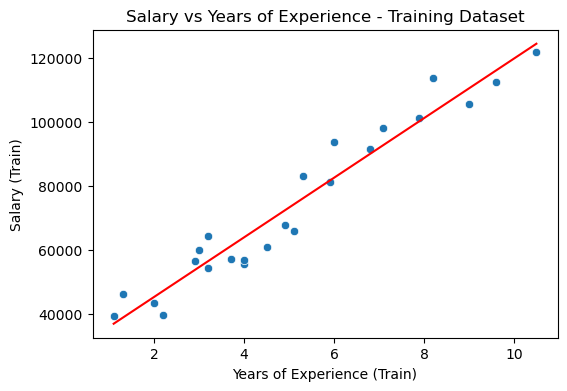

In [67]:
plt.figure(figsize=(6,4))
sns.scatterplot(y = y_train, x = X_train.ravel())
sns.lineplot(y = y_pred_train, x = X_train.ravel(), color = 'red')
plt.xlabel('Years of Experience (Train)')
plt.ylabel('Salary (Train)')
plt.title('Salary vs Years of Experience - Training Dataset');

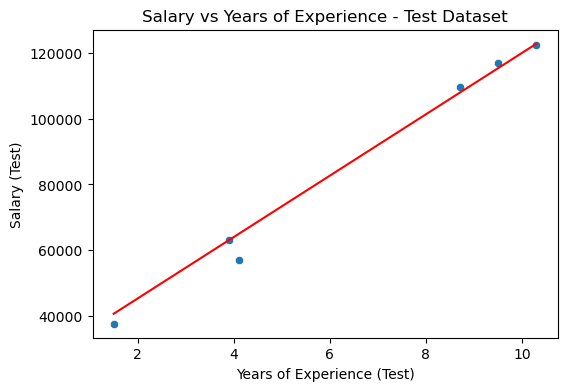

In [68]:
plt.figure(figsize=(6,4))

sns.scatterplot(y = y_test, x = X_test.ravel())
sns.lineplot(y = y_pred, x = X_test.ravel(), color = 'red')

plt.xlabel('Years of Experience (Test)')
plt.ylabel('Salary (Test)')
plt.title('Salary vs Years of Experience - Test Dataset');

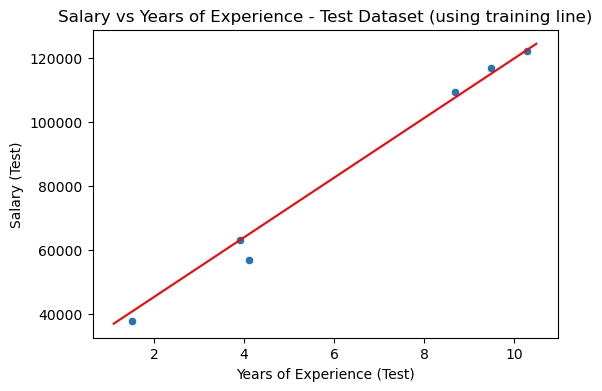

In [70]:
plt.figure(figsize=(6,4))

sns.scatterplot(y = y_test, x = X_test.ravel())
sns.lineplot(y = y_pred_train, x = X_train.ravel(), color = 'red')

plt.xlabel('Years of Experience (Test)')
plt.ylabel('Salary (Test)')
plt.title('Salary vs Years of Experience - Test Dataset (using training line)');

Regression Equestion

In [81]:
regressor.coef_, regressor.intercept_

(array([9312.57512673]), 26780.09915062818)

In [86]:
print(f'Salary = {np.round(regressor.coef_,2)}*Experience(in years) + {np.round(regressor.intercept_,2)}')

Salary = [9312.58]*Experience(in years) + 26780.1


Making Predictions of new datapoints

In [77]:
new_val = [12] # new datapoint of 12 years of experience

In [78]:
new_val = np.array(new_val).reshape(-1,1)

In [79]:
regressor.predict(new_val)

array([138531.00067138])